In [ ]:

# Research Data Analysis Project

This notebook explores the relationships within a research dataset. We'll conduct data cleaning, visualization, and statistical analysis to uncover trends—like and how different factors impact research performance.


In [1]:
 #Import Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
dataset=pd.read_csv(r"C:\Users\kelly\Downloads\research_data.csv")
dataset.head()

,Participant_ID,Gender,Age,Education_Level,Research_Field,Years_of_Experience,Publications_Count,Grant_Received,Research_Hours_Per_Week,Math_Score
0,PID1000,Other,33,Undergraduate,Climate Science,10,10,Yes,21,78
1,PID1001,Male,23,Undergraduate,Psychology,29,14,Yes,41,98
2,PID1002,Other,24,Master's,Data Science,22,23,Yes,29,78
3,PID1003,Other,58,Master's,Climate Science,21,37,Yes,42,93
4,PID1004,Male,38,Undergraduate,Biotech,6,34,No,16,65


In [3]:
summary_statistics = dataset.describe()
(summary_statistics)

,Age,Years_of_Experience,Publications_Count,Research_Hours_Per_Week,Math_Score
count,200.000000,200.000000,200.00000,200.000000,200.000000
mean,41.770000,14.440000,24.99000,33.755000,75.590000
std,11.247204,8.261821,13.98096,14.971832,14.775775
min,22.000000,1.000000,0.00000,5.000000,50.000000
25%,32.000000,6.750000,12.00000,21.000000,62.000000
50%,43.000000,14.000000,26.00000,34.500000,77.500000
75%,52.000000,22.000000,37.00000,46.250000,89.000000
max,59.000000,29.000000,49.00000,59.000000,99.000000


In [7]:
dataset.isnull().sum()
dataset.duplicated().sum()

0

In [9]:
participants_per_field = dataset["Research_Field"].value_counts()
( participants_per_field)

Research_Field
Psychology         47
AI                 40
Climate Science    39
Biotech            39
Data Science       35
Name: count, dtype: int64

In [11]:
research_hours_distribution = dataset["Research_Hours_Per_Week"].describe()
(research_hours_distribution)

count    200.000000
mean      33.755000
std       14.971832
min        5.000000
25%       21.000000
50%       34.500000
75%       46.250000
max       59.000000
Name: Research_Hours_Per_Week, dtype: float64

In [13]:
avg_publications_per_education = dataset.groupby("Education_Level")["Publications_Count"].mean()
(avg_publications_per_education)

Education_Level
Master's         24.229508
PhD              26.571429
Undergraduate    24.481928
Name: Publications_Count, dtype: float64

In [15]:
#Chi-Square Tests
table1 = pd.crosstab(dataset["Gender"], dataset["Grant_Received"])

In [17]:
chi2_1, p_1, _, _ = stats.chi2_contingency(table1)
(chi2_1, "p-value:", p_1)

(2.0597077897774057, 'p-value:', 0.35705912492150177)

In [19]:
table2 = pd.crosstab(dataset["Education_Level"], dataset["Research_Field"])
chi2_2, p_2, _, _ = stats.chi2_contingency(table2)
(chi2_2, "p-value:", p_2)

(2.170524313036262, 'p-value:', 0.9753326225342399)

In [21]:
table3 = pd.crosstab(dataset["Research_Field"], dataset["Grant_Received"])
chi2_3, p_3, _, _ = stats.chi2_contingency(table3)
(chi2_3, "p-value:", p_3)

(6.016896578598706, 'p-value:', 0.1978899752790934)

In [23]:
# T-Tests
ttest1 = stats.ttest_ind(dataset[dataset["Gender"] == "Male"]["Research_Hours_Per_Week"],
                          dataset[dataset["Gender"] == "Female"]["Research_Hours_Per_Week"],
                          equal_var=False)
(ttest1.statistic, "p-value:", ttest1.pvalue)

(-0.47452326887504853, 'p-value:', 0.6359790530581009)

In [25]:
ttest2 = stats.ttest_ind(dataset[dataset["Grant_Received"] == "Yes"]["Math_Score"],
                          dataset[dataset["Grant_Received"] == "No"]["Math_Score"],
                          equal_var=False)
(ttest2.statistic, "p-value:", ttest2.pvalue)

(1.7412019224817172, 'p-value:', 0.08320505842798134)

In [27]:
ttest3 = stats.ttest_ind(dataset[dataset["Education_Level"] == "PhD"]["Publications_Count"],
                          dataset[dataset["Education_Level"] == "Master's"]["Publications_Count"],
                          equal_var=False)
(ttest3.statistic, "p-value:", ttest3.pvalue)

(0.9498537227857455, 'p-value:', 0.34422060097942386)

In [29]:
#ANOVA
anova1=ols("Years_of_Experience~Research_Field",data=dataset).fit()
anova1_1=sm.stats.anova_lm(anova1,type=2)
anova1_1

,df,sum_sq,mean_sq,F,PR(>F)
Research_Field,4.0,205.262759,51.315690,0.747985,0.560441
Residual,195.0,13378.017241,68.605217,NaN,NaN


In [31]:
anova1 =ols('Math_Score ~ C(Education_Level)', data=dataset).fit()
anova1_1 = sm.stats.anova_lm(anova1, typ=2)
anova1_1

,sum_sq,df,F,PR(>F)
C(Education_Level),284.691331,2.0,0.649699,0.523318
Residual,43161.688669,197.0,NaN,NaN


In [33]:
anova1 = smf.ols('Research_Hours_Per_Week ~ C(Research_Field)', data=dataset).fit()
anova1_1 = sm.stats.anova_lm(anova1, typ=2)
anova1_1

,sum_sq,df,F,PR(>F)
C(Research_Field),784.555297,4.0,0.872774,0.481249
Residual,43822.439703,195.0,NaN,NaN


In [35]:
#Simple Linear Regression
linreg1 = smf.ols("Publications_Count ~ Years_of_Experience", data=dataset).fit() 
linreg1_summary = linreg1.summary()
linreg1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Publications_Count   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.192
Date:                Sun, 25 May 2025   Prob (F-statistic):              0.140
Time:                        10:32:59   Log-Likelihood:                -809.72
No. Observations:                 200   AIC:                             1623.
Df Residuals:                     198   BIC:                             1630.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              27.5468      1.989     13.853      0.000      23.625      31.468
Years_of_Experience    -0.1771      0.120     -1.480      0.140      -0.413       0.059
==============================================================================
Omnibus:                       89.242   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.469
Skew:                          -0.136   Prob(JB):                      0.00196
Kurtosis:                       1.807   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
linreg1 = smf.ols("Math_Score ~ Research_Hours_Per_Week", data=dataset).fit() 
linreg1_summary = linreg1.summary()
linreg1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Math_Score   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9753
Date:                Sun, 25 May 2025   Prob (F-statistic):              0.325
Time:                        10:33:02   Log-Likelihood:                -821.39
No. Observations:                 200   AIC:                             1647.
Df Residuals:                     198   BIC:                             1653.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  77.9223      2.582     30.174      0.000      72.830      83.015
Research_Hours_Per_Week    -0.0691      0.070     -0.988      0.325      -0.207       0.069
==============================================================================
Omnibus:                      129.806   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.534
Skew:                          -0.107   Prob(JB):                      0.00115
Kurtosis:                       1.744   Cond. No.                         91.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
linreg1 = smf.ols("Publications_Count ~ Age", data=dataset).fit() 
linreg1_summary = linreg1.summary()
linreg1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Publications_Count   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.2909
Date:                Sun, 25 May 2025   Prob (F-statistic):              0.590
Time:                        10:33:07   Log-Likelihood:                -810.68
No. Observations:                 200   AIC:                             1625.
Df Residuals:                     198   BIC:                             1632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.9786      3.818      7.066      0.000      19.450      34.508
Age           -0.0476      0.088     -0.539      0.590      -0.222       0.126
==============================================================================
Omnibus:                       82.366   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.191
Skew:                          -0.137   Prob(JB):                      0.00225
Kurtosis:                       1.822   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
from scipy.stats import spearmanr
spearmanr(dataset.Research_Hours_Per_Week,dataset.Years_of_Experience)

SignificanceResult(statistic=0.07430015725675244, pvalue=0.2957352703263412)

In [43]:
spearmanr(dataset.Math_Score,dataset.Publications_Count)

SignificanceResult(statistic=-0.012149823821454032, pvalue=0.8644173935143866)

In [45]:
spearmanr(dataset.Grant_Received,dataset.Research_Hours_Per_Week)

SignificanceResult(statistic=-0.03144573658368859, pvalue=0.6584662277691569)

Text(0.5, 1.0, 'Histogram of Research Hours Per Week')

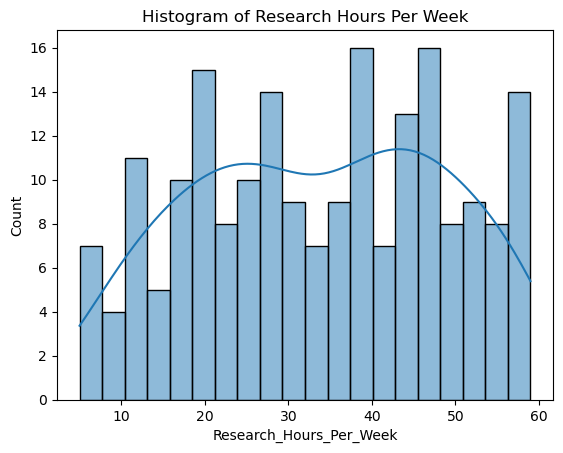

In [47]:
sns.histplot(dataset["Research_Hours_Per_Week"], bins=20, kde=True)
plt.title("Histogram of Research Hours Per Week")

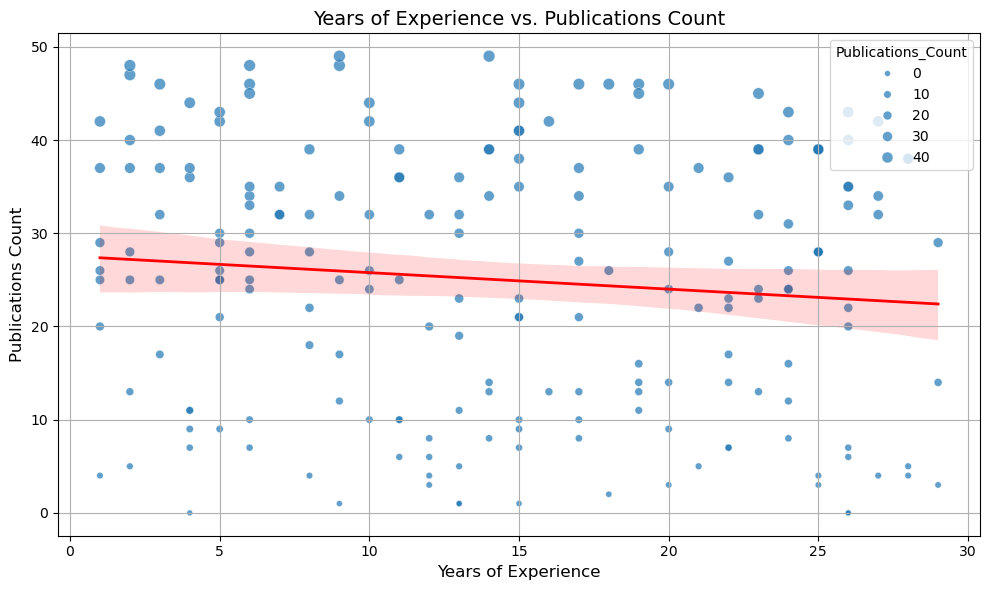

In [49]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10, 6))  # Bigger plot for better readability

#scatterplot with better aesthetics
sns.scatterplot(
    x=dataset["Years_of_Experience"], 
    y=dataset["Publications_Count"],
    hue=dataset["Field"] if "Field" in dataset.columns else None,  # Optional: color by category
    size=dataset["Publications_Count"],  # Optional: size by count
    alpha=0.7,  # Transparency to reduce clutter
    palette="viridis"
)

# Add a trend line (regression line) for better interpretation
sns.regplot(
    x=dataset["Years_of_Experience"], 
    y=dataset["Publications_Count"], 
    scatter=False, 
    color="red", 
    line_kws={"linewidth": 2}
)

plt.title("Years of Experience vs. Publications Count", fontsize=14)
plt.xlabel("Years of Experience", fontsize=12)
plt.ylabel("Publications Count", fontsize=12)
plt.grid(True)
plt.tight_layout()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Climate Science'),
  Text(1, 0, 'Psychology'),
  Text(2, 0, 'Data Science'),
  Text(3, 0, 'Biotech'),
  Text(4, 0, 'AI')])

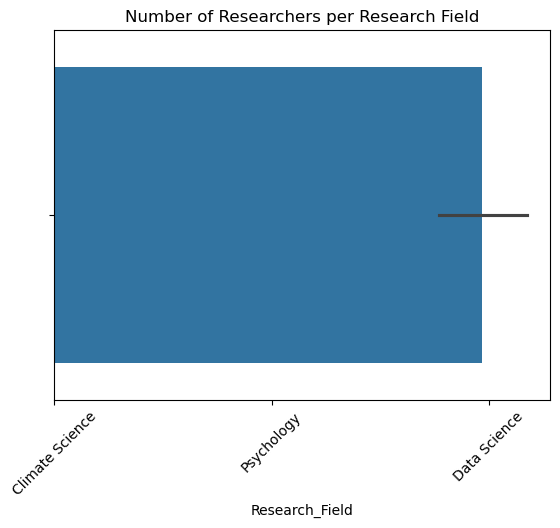

In [51]:
sns.barplot(x=dataset["Research_Field"])
plt.title("Number of Researchers per Research Field")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Climate Science'),
  Text(1, 0, 'Psychology'),
  Text(2, 0, 'Data Science'),
  Text(3, 0, 'Biotech'),
  Text(4, 0, 'AI')])

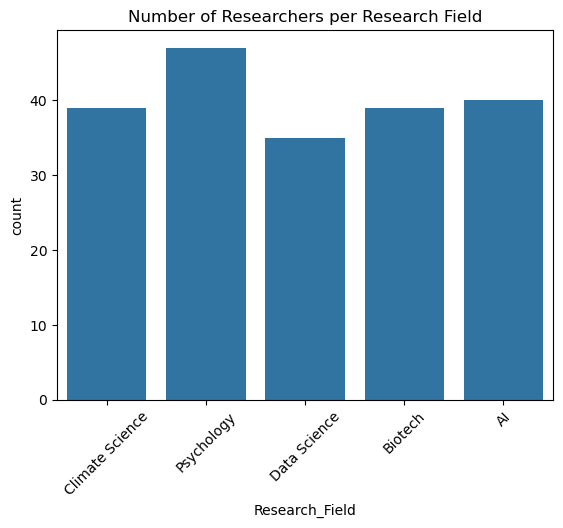

In [53]:
sns.countplot(x=dataset["Research_Field"])
plt.title("Number of Researchers per Research Field")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Correlation Heatmap')

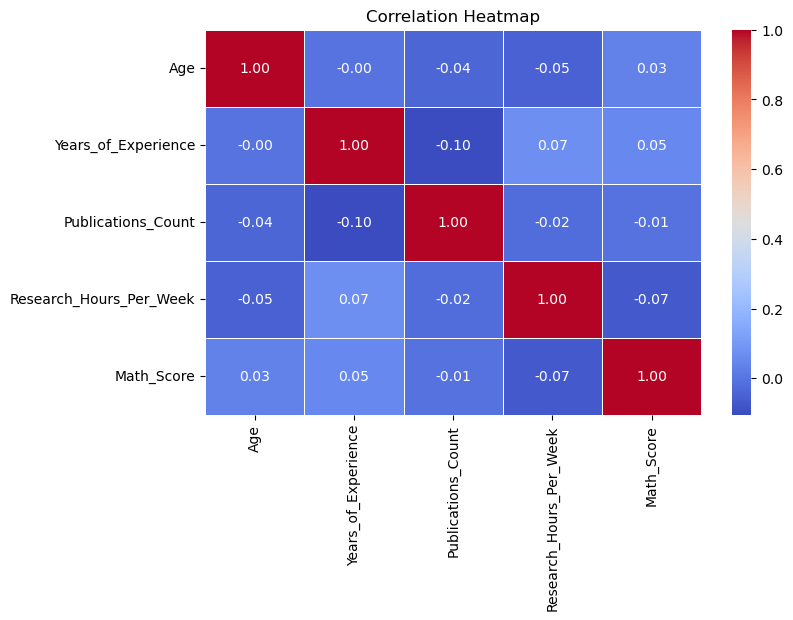

In [55]:
numerical_dataset = dataset.select_dtypes(include=["number"])
correlation_matrix = numerical_dataset.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")

In [57]:
dataset["trans_mathscore"] = dataset["Education_Level"].astype("category").cat.codes
(dataset[["Education_Level", "trans_mathscore"]].drop_duplicates())


,Education_Level,trans_mathscore
0,Undergraduate,2
2,Master's,0
5,PhD,1


In [59]:
# Encoding Education_Level
dataset["Education_Level_Encoded"] = dataset["Education_Level"].astype('category').cat.codes

# Multivariate regression
model = smf.ols('Publications_Count ~ Age + Years_of_Experience + Education_Level_Encoded', data=dataset).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Publications_Count   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8239
Date:                Sun, 25 May 2025   Prob (F-statistic):              0.482
Time:                        10:33:44   Log-Likelihood:                -809.57
No. Observations:                 200   AIC:                             1627.
Df Residuals:                     196   BIC:                             1640.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [61]:
import numpy as np
dataset["Publications_per_Year"] = dataset["Publications_Count"] / dataset["Years_of_Experience"].replace(0, np.nan)
dataset["Work_Intensity"] = dataset["Research_Hours_Per_Week"] / dataset["Publications_Count"].replace(0, np.nan)
print(dataset[["Publications_per_Year", "Work_Intensity"]].head())

   Publications_per_Year  Work_Intensity
0               1.000000        2.100000
1               0.482759        2.928571
2               1.045455        1.260870
3               1.761905        1.135135
4               5.666667        0.470588


In [63]:
z_scores = np.abs(stats.zscore(dataset.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)
print("Number of outliers detected:", outliers.sum())

Number of outliers detected: 7


In [65]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
features = dataset[["Years_of_Experience", "Research_Hours_Per_Week", "Publications_Count"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=42)
dataset["Cluster"] = kmeans.fit_predict(scaled_features)
print(dataset["Cluster"].value_counts())

Cluster
2    76
1    65
0    59
Name: count, dtype: int64


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Encoding grant reception
dataset["Grant_Received_Encoded"] = dataset["Grant_Received"].map({"Yes": 1, "No": 0})

# Features and label
X = dataset[["Years_of_Experience", "Math_Score", "Education_Level_Encoded"]]
y = dataset["Grant_Received_Encoded"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit and evaluate
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.47      0.53      0.50        30
           1       0.46      0.40      0.43        30

    accuracy                           0.47        60
   macro avg       0.47      0.47      0.46        60
weighted avg       0.47      0.47      0.46        60



Text(0.5, 1.0, 'K-Means Clustering of Researchers')

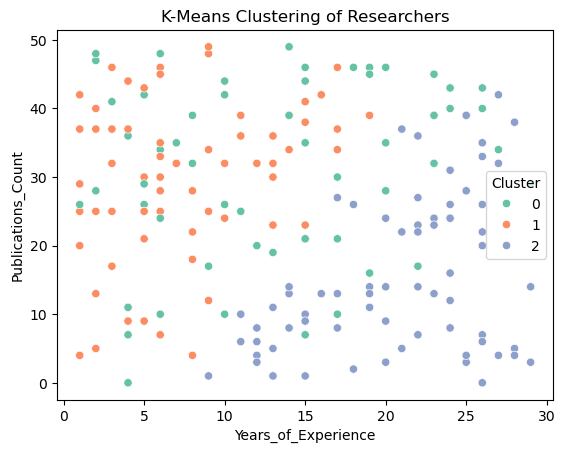

In [69]:
sns.scatterplot(data=dataset, x="Years_of_Experience", y="Publications_Count", hue="Cluster", palette="Set2")
plt.title("K-Means Clustering of Researchers")


Text(0.5, 1.0, 'Decision Tree for Grant Prediction')

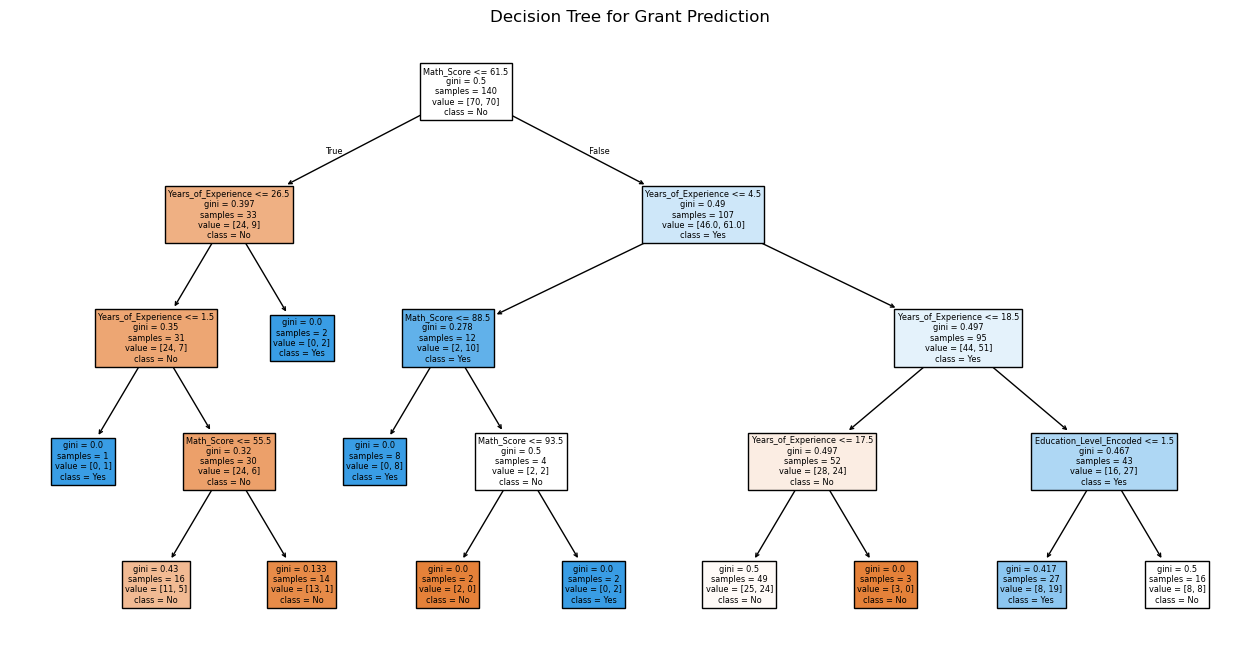

In [71]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

plt.figure(figsize=(16, 8))
plot_tree(tree, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree for Grant Prediction")

Text(0.5, 1.0, 'Research Hours vs Grant Reception')

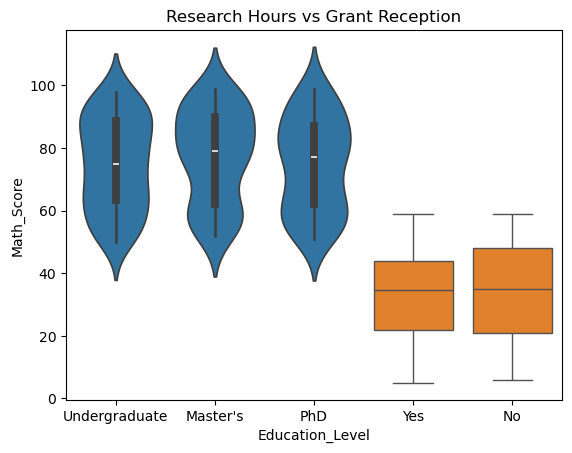

In [75]:
sns.violinplot(x="Education_Level", y="Math_Score", data=dataset)
plt.title("Math Scores Across Education Levels")
sns.boxplot(x="Grant_Received", y="Research_Hours_Per_Week", data=dataset)
plt.title("Research Hours vs Grant Reception")

Text(0.5, 1.0, 'Grant Reception')

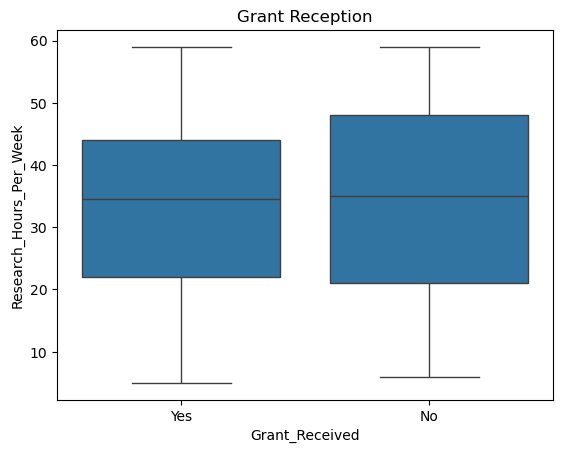

In [77]:
sns.boxplot(x="Grant_Received", y="Research_Hours_Per_Week", data=dataset)
plt.title("Grant Reception")

Text(0.5, 1.0, 'Mean Metrics by Research Field')

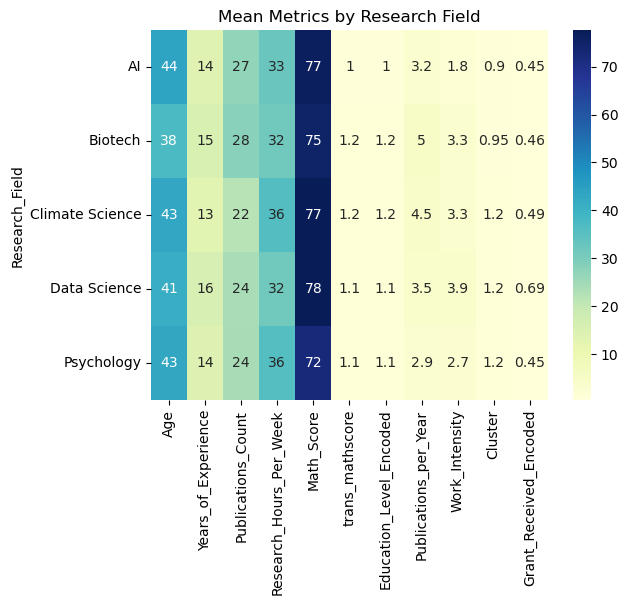

In [79]:
group_means = dataset.groupby("Research_Field").mean(numeric_only=True)
sns.heatmap(group_means, annot=True, cmap="YlGnBu")
plt.title("Mean Metrics by Research Field")

In [81]:
dataset.to_csv("enhanced_research_data.csv", index=False)